<a href="https://colab.research.google.com/github/Chinmayak1197/MNIST-DATASET/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 

In [ ]:
t1 = torch.tensor(4.)
#4. is shorthand of 4.0(type = float)
t1 

tensor(4.)

In [ ]:
t1.dtype

torch.float32

In [ ]:
t2 = torch.tensor([4.,2,3,4])
#each of the tensor should have same datatype
t2


tensor([4., 2., 3., 4.])

In [ ]:
t2.dtype

torch.float32

In [ ]:
t3 = torch.tensor([[5.,6],[7,8],[9,10]])
t3
#Difference between list and tensor 
#tensor have regular shapes same number of row and columns. 

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [ ]:
t1.shape
#Gives the number of row and columns 
#Shape start from the outermost bracket

torch.Size([])

In [ ]:
t2.shape

torch.Size([4])

In [ ]:
t3.shape

torch.Size([3, 2])

In [ ]:
#Tensor operations and gradients 
x = torch.tensor(3.)
w = torch.tensor(4.0 , requires_grad = True)
b = torch.tensor(5., requires_grad = True)
y = w*x + b 

In [ ]:
y 

tensor(17., grad_fn=<AddBackward0>)

In [ ]:
#Compute derivative 
y.backward()
print('dy/dx:' , x.grad)
print('dw/dx:' , w.grad)
print('db/dx:' , b.grad)

dy/dx: None
dw/dx: tensor(3.)
db/dx: tensor(1.)


In [ ]:
#Interoperability and Numpy
#Matplotlib, opencv and Pandas 
import numpy as np 
x = np.array([[1,2],[3,4.]])
x

array([[1., 2.],
       [3., 4.]])

In [ ]:
#Convert numpy array into torch tensor
#Torch.numpy uses same memory and torch.tensor makes a copy of the data 
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [ ]:
y = torch.tensor(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [ ]:
x.dtype , y.dtype

(dtype('float64'), torch.float64)

In [ ]:
#Convert tensor into numpy 
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

In [ ]:
#Manipulating tensor functions 
t6 = torch.full((3,2),42)
t6

tensor([[42, 42],
        [42, 42],
        [42, 42]])

In [ ]:
from torch.storage import T
#Concatenate two tensors with compatible shapes 
t7 = torch.cat((t3,t6))
t7

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.],
        [42., 42.],
        [42., 42.],
        [42., 42.]])

In [ ]:
#Sin of all the components of the tensors 
t8 = torch.sin(t7)

In [ ]:
t8

tensor([[-0.9589, -0.2794],
        [ 0.6570,  0.9894],
        [ 0.4121, -0.5440],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165]])

In [ ]:
#Change the shape of the tensors 
t9 = t8.reshape(3,2,2)
t9

tensor([[[-0.9589, -0.2794],
         [ 0.6570,  0.9894]],

        [[ 0.4121, -0.5440],
         [-0.9165, -0.9165]],

        [[-0.9165, -0.9165],
         [-0.9165, -0.9165]]])

In [ ]:
#Linear Regression 
import numpy as np 
import torch 

#Numpy Arrays 
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

In [ ]:
#Covert them to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
#Weighst and Biasis 
#Initialise with random values 
#Randn take svalue from -1 to 1, mean = 0 and SD = 1
w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2, requires_grad = True)
print(w)
print(b)

tensor([[-1.6729, -0.7927,  0.0076],
        [ 0.5307,  0.0514, -0.9344]], requires_grad=True)
tensor([ 0.2737, -1.2348], requires_grad=True)


In [ ]:
def model(x):
  return x @ w.t() + b

In [ ]:
preds = model(inputs)

In [ ]:
print(preds)

tensor([[-174.6327,    0.7651],
        [-221.2320,   -8.2271],
        [-251.0521,   -2.3803],
        [-204.1667,   20.5283],
        [-190.7245,  -25.0975]], grad_fn=<AddBackward0>)


In [ ]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
#MSE Loss 
#Torch.sum returns the sum and torch.numel returns the number of elements 
def mse(t1,t2):
  diff = t1 - t2
  return torch.sum(diff*diff/diff.numel())


In [ ]:
loss = mse(preds, targets)
print(loss)

tensor(47498.6914, grad_fn=<SumBackward0>)


In [ ]:
print(loss)

tensor(47498.6914, grad_fn=<SumBackward0>)


In [ ]:
#Compute Gradiants 
loss.backward()

In [ ]:
print(w)
print(w.grad)

tensor([[-1.6729, -0.7927,  0.0076],
        [ 0.5307,  0.0514, -0.9344]], requires_grad=True)
tensor([[-23973.9648, -25911.7012, -15930.3926],
        [ -7678.9482,  -9386.6650,  -5703.1938]])


In [ ]:
print(b)
print(b.grad)

tensor([ 0.2737, -1.2348], requires_grad=True)
tensor([-284.5616,  -94.8823])


In [ ]:
#if a gradient elem is postive, slightly decrease the w will decrease the loss. 
#if a gradient elem is negative, slightly increase the w will decrease the loss. 
#Move opposite the direction of the gradient 


#Reset the gradient values to zero 
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [ ]:
#Adjust weights and biasis using gradient descent 

preds = model(inputs)
print(preds)

loss = mse(preds, targets)
print(loss)

loss.backward()
print(w.grad)
print(b.grad)




tensor([[-174.6327,    0.7651],
        [-221.2320,   -8.2271],
        [-251.0521,   -2.3803],
        [-204.1667,   20.5283],
        [-190.7245,  -25.0975]], grad_fn=<AddBackward0>)
tensor(47498.6914, grad_fn=<SumBackward0>)
tensor([[-23973.9648, -25911.7012, -15930.3926],
        [ -7678.9482,  -9386.6650,  -5703.1938]])
tensor([-284.5616,  -94.8823])


In [ ]:
#Adjust the weighst propotional to the gradients 

with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5

  w.grad.zero_()
  b.grad.zero_()

In [ ]:
print(w)
print(b)

tensor([[-1.4332, -0.5336,  0.1669],
        [ 0.6075,  0.1452, -0.8774]], requires_grad=True)
tensor([ 0.2765, -1.2339], requires_grad=True)


In [ ]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(32205.8262, grad_fn=<SumBackward0>)


In [ ]:
#Train for 100 epochs 
for i in range(300):
  preds = model(inputs)
  loss = mse(preds, targets)
  loss.backward()
  with torch.no_grad():
    w -= w.grad * 1e-5 
    b -= b.grad * 1e-5 
    
    w.grad.zero_()
    b.grad.zero_()

In [ ]:
  preds = model(inputs)
  loss = mse(preds, targets)
  print(loss)

tensor(80.8540, grad_fn=<SumBackward0>)


In [ ]:
preds

tensor([[ 57.2563,  72.5343],
        [ 83.6055,  93.6998],
        [115.3666, 145.2300],
        [ 21.4660,  50.2947],
        [104.1859,  99.0190]], grad_fn=<AddBackward0>)

In [ ]:
#Linear regression using builtin functiosn in pytorch 
#nn package consit of utilities package for the neural network

import torch.nn as nn


#Numpy Arrays 
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)


In [ ]:
 #Dataset and Dataloader
 #Tensordataset allows to access the rows from the inputs and targets as tuples. 

 from torch.utils.data import TensorDataset 
 

In [ ]:
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]



(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [ ]:
#Dataloader can split the data into batches of predefined size while training, shuffling and randomsize 

from torch.utils.data import DataLoader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle = True)

for xb,yb in train_dl:
  print(xb)
  print(yb)
  break

tensor([[ 92.,  87.,  64.],
        [ 87., 134.,  58.],
        [101.,  44.,  37.],
        [ 73.,  67.,  43.],
        [ 69.,  96.,  70.]])
tensor([[ 82., 100.],
        [119., 133.],
        [ 21.,  38.],
        [ 56.,  70.],
        [103., 119.]])


In [ ]:
#Define Model 
#Linear(inputs, outputs)
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)


Parameter containing:
tensor([[ 0.0700,  0.4470, -0.2257],
        [-0.4369, -0.3968,  0.4887]], requires_grad=True)
Parameter containing:
tensor([-0.3738, -0.3548], requires_grad=True)


In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0700,  0.4470, -0.2257],
         [-0.4369, -0.3968,  0.4887]], requires_grad=True),
 Parameter containing:
 tensor([-0.3738, -0.3548], requires_grad=True)]

In [ ]:
preds = model(inputs)
preds



tensor([[ 24.9822, -37.8179],
        [ 30.8904, -43.7519],
        [ 52.5283, -63.1870],
        [ 17.6368, -43.8976],
        [ 31.5730, -34.3824],
        [ 24.6051, -37.8581],
        [ 30.2177, -42.8665],
        [ 52.3726, -63.1352],
        [ 18.0139, -43.8574],
        [ 31.2773, -33.4569],
        [ 24.3095, -36.9325],
        [ 30.5133, -43.7921],
        [ 53.2011, -64.0724],
        [ 17.9325, -44.8231],
        [ 31.9500, -34.3423]], grad_fn=<AddmmBackward0>)

In [ ]:
#Loss funtions 
import torch.nn.functional as F 
loss_fn = F.mse_loss

In [ ]:
#To get the documentation of the function (HELP)
?nn.Linear

In [ ]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(11401.5449, grad_fn=<MseLossBackward0>)


In [ ]:
#Define Optimizer 
opt = torch.optim.SGD(model.parameters(), lr = 1e-5)


In [ ]:
#Train the model 
#Utility function to train the model 

def fit(num_epochs, model, loss_fn, opt):

  for epoch in range(num_epochs):
    for xb,yb in train_dl:
      pred = model(xb)
      loss = loss_fn(pred,yb)
      loss.backward()
      opt.step()
      opt.zero_grad()

    if (epoch+1) % 10 == 0:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


In [ ]:
fit(100, model, loss_fn, opt)

Epoch [10/100], Loss: 200.8749
Epoch [20/100], Loss: 125.1174
Epoch [30/100], Loss: 67.4014
Epoch [40/100], Loss: 60.9599
Epoch [50/100], Loss: 98.3403
Epoch [60/100], Loss: 14.2940
Epoch [70/100], Loss: 67.6601
Epoch [80/100], Loss: 44.4176
Epoch [90/100], Loss: 27.9313
Epoch [100/100], Loss: 29.7952


In [ ]:
preds = model(inputs)
preds

tensor([[ 58.1069,  71.0641],
        [ 78.6027, 101.7001],
        [124.0620, 129.1000],
        [ 27.5334,  42.0360],
        [ 91.9066, 117.9524],
        [ 56.9143,  70.1392],
        [ 77.7688, 101.9512],
        [124.0180, 129.8266],
        [ 28.7260,  42.9608],
        [ 92.2653, 119.1284],
        [ 57.2729,  71.3152],
        [ 77.4101, 100.7752],
        [124.8960, 128.8489],
        [ 27.1747,  40.8600],
        [ 93.0992, 118.8773]], grad_fn=<AddmmBackward0>)

In [ ]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

In [ ]:
#MNIST Project 
#torchvision cointains utilities for working with the image data, also allows to get popular dataset 

import torch 
import torchvision 
from torchvision.datasets import MNIST

#Download the training dataset 
dataset =  MNIST(root='data/' , download = True)

len(dataset)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



60000

In [ ]:
test_dataset = MNIST(root='data/', train = False)
len(test_dataset)

10000

In [ ]:
#PIL is python imaging library pillow to load the images 
dataset[0]

import matplotlib.pyplot as plt
#Inline command which tells that we need to see the graphs in the notebook not as a popoup 
%matplotlib inline 

Label:  5


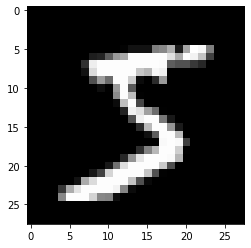

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap= 'gray')
print('Label: ', label)

Label:  3


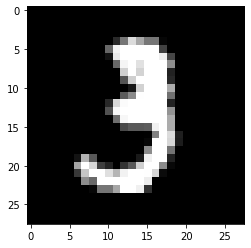

In [ ]:
image, label = dataset[10]
plt.imshow(image, cmap= 'gray')
print('Label: ', label)

In [ ]:
import torchvision.transforms as transforms
#these convert images to tensors 

dataset = MNIST(root = "data/", train = True, transform = transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape , label )

#First dimension is the color channel 
#next two dimensions are height and width 


torch.Size([1, 28, 28]) 5


In [ ]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


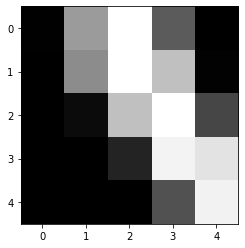

In [ ]:
#Matplotlib keeps the color dimension as the last or does not keep it whereas the pytorch keeps it as the first dimensions
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [ ]:
import numpy as np 

def split_indices(n, val_pct):
  n_val = int(n*val_pct)
  idex = np.random.permutation(n)

  return idex[n_val:], idex[:n_val]




In [ ]:
train_indices , val_indices = split_indices(len(dataset), val_pct = 0.2)

print(len(train_indices), len(val_indices))
print('sample val indices:', val_indices[:20])

#Randomly sampling is done as the data may be in order 
#time series might be tricky so has to see case v=bt case and does not have to do random smapling  

48000 12000
sample val indices: [42362 23927 46272 53564 32307 10389 12122 37972 16954 42007 36619 58799
 32198 32645 35942 19627 16450 33214 55784 24639]


In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader 

batch_size = 100 
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, sampler= val_sampler)



In [ ]:
#Define Model 

import torch.nn as nn 

input_size = 28*28
num_classes = 10 

#Input = image size and y = number of classes for logistic regression 
model = nn.Linear(input_size, num_classes)


In [ ]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0322,  0.0162,  0.0168,  ..., -0.0017, -0.0338, -0.0211],
        [-0.0107, -0.0112, -0.0050,  ...,  0.0007,  0.0127, -0.0099],
        [ 0.0021,  0.0263,  0.0260,  ..., -0.0338,  0.0271,  0.0176],
        ...,
        [-0.0201,  0.0223, -0.0306,  ..., -0.0171, -0.0033, -0.0224],
        [ 0.0331,  0.0124,  0.0183,  ..., -0.0355, -0.0248,  0.0157],
        [-0.0316,  0.0252,  0.0291,  ..., -0.0137, -0.0135,  0.0192]],
       requires_grad=True)

In [ ]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0014,  0.0030, -0.0134, -0.0333,  0.0138,  0.0306,  0.0199, -0.0118,
         0.0317, -0.0104], requires_grad=True)

In [ ]:
for images, labels in train_loader:
  print(images.shape)
  print(labels)
  outputs = model(images)
  break


torch.Size([100, 1, 28, 28])
tensor([9, 6, 7, 3, 6, 9, 9, 2, 9, 5, 8, 3, 0, 1, 2, 6, 9, 1, 3, 2, 3, 6, 1, 3,
        9, 3, 5, 8, 7, 2, 8, 8, 7, 6, 8, 3, 7, 3, 1, 3, 5, 2, 0, 9, 9, 7, 8, 9,
        4, 6, 6, 6, 7, 5, 1, 3, 2, 6, 1, 8, 4, 4, 4, 1, 8, 2, 1, 7, 7, 3, 1, 2,
        0, 2, 3, 1, 0, 1, 6, 2, 3, 9, 1, 5, 4, 7, 9, 0, 7, 0, 7, 7, 5, 8, 8, 7,
        2, 2, 4, 5])


RuntimeError: ignored

In [ ]:
#Using module from pytoch as shape of the input has to be changed
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()#how inheretence work if extending the class 
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out 

model = MnistModel()


In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)
#List of all the parameters in the models
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0338,  0.0313, -0.0350,  ..., -0.0222,  0.0232,  0.0014],
         [-0.0168, -0.0138,  0.0106,  ..., -0.0313,  0.0119,  0.0301],
         [-0.0130, -0.0054,  0.0114,  ..., -0.0088, -0.0283,  0.0327],
         ...,
         [ 0.0318, -0.0054,  0.0111,  ..., -0.0257,  0.0322, -0.0254],
         [ 0.0286,  0.0311,  0.0118,  ...,  0.0155,  0.0225,  0.0159],
         [ 0.0294,  0.0192, -0.0177,  ...,  0.0282, -0.0043,  0.0066]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0080,  0.0162,  0.0225,  0.0297,  0.0134,  0.0242,  0.0285,  0.0059,
         -0.0253, -0.0224], requires_grad=True)]

In [ ]:
for images, labels in train_loader:
  outputs = model(images)
  break

In [ ]:
print("Output.shapes :", outputs.shape)
print("Sample Output : \n", outputs[:2].data)

Output.shapes : torch.Size([100, 10])
Sample Output : 
 tensor([[ 0.2387, -0.1598, -0.1463, -0.0792,  0.0145,  0.4869, -0.0038, -0.0814,
          0.1881, -0.0776],
        [ 0.1511, -0.1496,  0.2419,  0.0987,  0.1399, -0.0268,  0.1134,  0.0174,
         -0.0791, -0.1961]])


In [ ]:
#sOFTMAX: CONVERT THE OPUTPUT INTO THE PROBABILITY 
#LOGITS To PROBABILITES
import torch.nn.functional as F 
probs = F.softmax(outputs , dim =1)

print("Sample Probabilites:\n", probs[:2].data)
print("Sum : ", torch.sum(probs[2]).item())

Sample Probabilites:
 tensor([[0.1197, 0.0804, 0.0815, 0.0871, 0.0957, 0.1535, 0.0940, 0.0870, 0.1138,
         0.0873],
        [0.1117, 0.0827, 0.1224, 0.1060, 0.1105, 0.0935, 0.1076, 0.0978, 0.0888,
         0.0790]])
Sum :  1.0000001192092896


In [ ]:
#To get the maximum probabities 
max_pred, preds = torch.max(probs, dim=1)
print(preds)
print(max_pred)

tensor([5, 2, 4, 8, 8, 6, 0, 0, 0, 0, 2, 6, 0, 0, 2, 8, 3, 7, 0, 8, 8, 0, 0, 8,
        8, 0, 3, 7, 8, 3, 5, 3, 0, 7, 8, 2, 2, 0, 2, 2, 2, 1, 5, 0, 3, 8, 5, 3,
        8, 0, 8, 8, 8, 7, 3, 2, 3, 7, 2, 8, 9, 5, 0, 8, 2, 0, 8, 8, 7, 2, 2, 0,
        8, 3, 8, 3, 8, 5, 3, 0, 0, 3, 0, 0, 0, 8, 8, 2, 5, 8, 3, 3, 0, 2, 2, 0,
        8, 1, 8, 2])
tensor([0.1535, 0.1224, 0.1137, 0.1280, 0.1193, 0.1220, 0.1229, 0.1226, 0.1294,
        0.1317, 0.1148, 0.1188, 0.1368, 0.1311, 0.1610, 0.1208, 0.1155, 0.1327,
        0.1260, 0.1232, 0.1335, 0.1481, 0.1246, 0.1447, 0.1233, 0.1221, 0.1267,
        0.1213, 0.1221, 0.1093, 0.1334, 0.1386, 0.1400, 0.1114, 0.1233, 0.1291,
        0.1307, 0.1290, 0.1163, 0.1263, 0.1290, 0.1128, 0.1227, 0.1134, 0.1350,
        0.1402, 0.1139, 0.1278, 0.1523, 0.1347, 0.1195, 0.1136, 0.1345, 0.1255,
        0.1245, 0.1145, 0.1210, 0.1198, 0.1261, 0.1477, 0.1264, 0.1227, 0.1588,
        0.1207, 0.1207, 0.1220, 0.1358, 0.1312, 0.1282, 0.1249, 0.1184, 0.1162,
        0.1369, 0.1

In [ ]:
labels

tensor([6, 1, 6, 7, 4, 7, 0, 4, 9, 0, 1, 0, 0, 7, 5, 9, 5, 2, 9, 8, 0, 6, 9, 9,
        9, 1, 3, 8, 4, 7, 0, 3, 6, 1, 0, 2, 9, 4, 1, 5, 5, 4, 2, 2, 3, 6, 6, 6,
        0, 3, 3, 7, 8, 6, 6, 1, 8, 9, 5, 2, 6, 4, 9, 8, 3, 1, 9, 7, 8, 1, 1, 1,
        2, 3, 8, 0, 6, 6, 4, 9, 0, 4, 7, 1, 2, 5, 7, 5, 6, 6, 3, 8, 4, 9, 9, 6,
        2, 4, 7, 9])

In [ ]:
#Evaluation metric and loss functions 
torch.sum(labels == preds).item()/len(labels)

0.14

In [ ]:
#Calculate the accuracy 
def accuracy(x,y):
  return torch.sum(x == y).item()/len(x)

In [ ]:
accuracy(preds, labels)



0.14

In [ ]:
#accuracy cannot be used as the loss function 
#torch.max is not differentiable, == is not a mathematical function, non continous and non differentiable
#does not take into account the actual probabiltiy of the model 

#accuracy is a good evaluation matrix but not a good loss function so we use cross entropy loss 

In [ ]:
loss_fn = F.cross_entropy
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3048, grad_fn=<NllLossBackward0>)


In [ ]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
def loss_batch(model, loss_func, xb, yb, opt= None, metric= None):
  pred = model(xb)
  loss = loss_func(preds, yb)

  if opt is not None:
    loss.backward
    opt.step()
    opt.zero_grad()
  
  metric_result = None
  if metric is not None:
    metric_result = metric(pred, y)
  return loss.item(), len(xb), metric_result

In [ ]:
#To calculate the loss function and accuracy for the validation set 

def evaluates(model, loss_fn, valid_dl, metric= None):
  with torch.no_grad():
    result = [loss_batch(model, loss_fn, xb, yb, metric= metric)
              for xb,yb in valid_dl]

    losses, nums, metrics = zip(*result)
    total = np.sum(nums) 

    avg_loss = np.sum(np.multiply(losses, nums))/ total
    avg_metric = None
    
    if metric is not None:
      avg_metric = np.sum(np.multiply(metrics, nums))/total
    
    return avg_loss, total, avg_metric 


In [ ]:
def accuracy(outputs, labels):
  _,preds = torch.max(outputs, dim =1)
  return torch.sum(preds == labels).item()/ len(preds)

In [ ]:
val_loss, total, val_acc = evaluates(model, loss_fn , val_loader, metric = accuracy)
print('Loss:  , Accuracy:'.format(val_loss, val_acc))

RuntimeError: ignored

In [ ]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric = None):
  for epoch in range(epochs):
    for xb, yb in train_dl:
      loss, _,_ = loss_batch (model, loss_fn, xb, yb, opt)
    
    result = evaluates(model, loss_fn, valid_dl, metric)
    val_loss, total, val_metric = result

    if metric is None:
      print()


In [ ]:
#Saving and Loading the model 
# .state_dict  methods helps to return the orderedDict 
torch.save(model.state_dict(), 'FileName.pth')
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0338,  0.0313, -0.0350,  ..., -0.0222,  0.0232,  0.0014],
                      [-0.0168, -0.0138,  0.0106,  ..., -0.0313,  0.0119,  0.0301],
                      [-0.0130, -0.0054,  0.0114,  ..., -0.0088, -0.0283,  0.0327],
                      ...,
                      [ 0.0318, -0.0054,  0.0111,  ..., -0.0257,  0.0322, -0.0254],
                      [ 0.0286,  0.0311,  0.0118,  ...,  0.0155,  0.0225,  0.0159],
                      [ 0.0294,  0.0192, -0.0177,  ...,  0.0282, -0.0043,  0.0066]])),
             ('linear.bias',
              tensor([ 0.0080,  0.0162,  0.0225,  0.0297,  0.0134,  0.0242,  0.0285,  0.0059,
                      -0.0253, -0.0224]))])

In [ ]:
#Loading the Model 
model12 = MnistModel()
model12.load_state_dict(torch.load("FileName.pth"))
model12.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0338,  0.0313, -0.0350,  ..., -0.0222,  0.0232,  0.0014],
                      [-0.0168, -0.0138,  0.0106,  ..., -0.0313,  0.0119,  0.0301],
                      [-0.0130, -0.0054,  0.0114,  ..., -0.0088, -0.0283,  0.0327],
                      ...,
                      [ 0.0318, -0.0054,  0.0111,  ..., -0.0257,  0.0322, -0.0254],
                      [ 0.0286,  0.0311,  0.0118,  ...,  0.0155,  0.0225,  0.0159],
                      [ 0.0294,  0.0192, -0.0177,  ...,  0.0282, -0.0043,  0.0066]])),
             ('linear.bias',
              tensor([ 0.0080,  0.0162,  0.0225,  0.0297,  0.0134,  0.0242,  0.0285,  0.0059,
                      -0.0253, -0.0224]))])

In [ ]:
#Training Deep Learning with GPU 
#FeedForward Neural networks with GPU

import torch 
import numpy as np 
import torchvision 
from torchvision.datasets import MNIST 
from torchvision.transforms import ToTensor 
from torch.utils.data.sampler import SubsetRandomSampler 
from torch.utils.data.dataloader import DataLoader 
 



In [ ]:
dataset = MNIST(root='data/',
                download = True,
                transform = ToTensor())

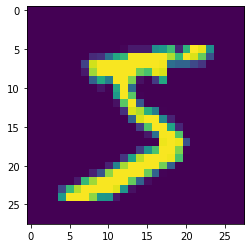

In [ ]:
dataset

img, label = dataset[0]
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.imshow(img[0])

In [ ]:
#Spliting the dataset

def splitindices(n, val_pct):
  n_val = int(val_pct *n)
  index = np.random.permutation(n)
  
  return index[:n_val], index[n_val:]


In [ ]:
train_indices , val_indices = splitindices(len(dataset), val_pct = 0.2)
print(len(train_indices), len(val_indices))
print("Sample val indices : ", val_indices[:20])

12000 48000
Sample val indices :  [29116 47195 49059 23985 50309 30421 30444 41902 56532 38642 33056  8396
 47280  4079 45045  9357 12945 19748 53169 27233]


In [ ]:
# Creating the data Loaders 

batch_sizes = 100 

train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset, 
                      batch_sizes, 
                      sampler = train_sampler)


valid_sampler = SubsetRandomSampler(val_indices)
valid_dl = DataLoader(dataset, 
                      batch_sizes, 
                      sampler = valid_sampler)

In [ ]:
print(len(train_dl), len(valid_dl))

120 480


In [ ]:
#Two nn.linear will be used. 
import torch.nn.functional as F 
import torch.nn as nn 


In [ ]:
for xb,yb in train_dl:
  xb = xb.view(xb.size(0),784)   #Retain the shape of batch size , -1 does the calculation directly of the input size *input size 
  print(xb.shape)
  break
  

torch.Size([100, 784])


In [ ]:
class MNIST(nn.Module):
  # "Feedforward network with one Neural Network"
#  inti is instance of the object 
  def __init__(self, in_size, hidden_size, out_size):
    super().__init__()

    self.linear1 = nn.Linear(in_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size, out_size)

  def forward(self, xb):
    # Flatten the image tensor(1,28,28) -> vector 
    xb = xb.view(xb.size(0), -1)
    out = self.linear1(xb)
    out = F.relu(out)
    out = self.linear2(out)

    return out

In [ ]:
input_size = 784 
num_classes = 10 

model = MNIST(input_size, 
              hidden_size = 32, 
              out_size = num_classes)


In [ ]:
for t in model.parameters():
  print(t.shape)


torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [ ]:
for images, labels in train_dl:
  print("images.shape", images.shape)
  outputs = model(images)
  loss = F.cross_entropy(outputs, labels)
  print("Loss:", loss.item())
  break

print('output.shape :', outputs.shape)
print('Sample output :/n', (outputs)[:2].data)
# For Softmax F.softmax(outputs)[:2].data
# For probability sum torch.sum(F.softmax(outputs)[0]))

images.shape torch.Size([100, 1, 28, 28])
Loss: 2.2888920307159424
output.shape : torch.Size([100, 10])
Sample output :/n tensor([[ 0.0619, -0.0066, -0.2950,  0.1360, -0.0768,  0.0560,  0.0216,  0.1420,
          0.1343, -0.1928],
        [ 0.0298, -0.0063, -0.0803,  0.1033,  0.0060, -0.0822, -0.1127,  0.1207,
         -0.0508, -0.1036]])


In [ ]:
#Using a GPU 
#To check  the GPU is availabolle for the system or not 
torch.cuda.is_available()

True

In [ ]:
#Code uses GPU if its availble 
def get_default_device():
  "Pick GPU if availble"
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu') 

In [ ]:
device =  get_default_device()
device

device(type='cuda')

In [ ]:
#Can move the data and model to a choosen device
def to_device(data, device):
  # "Move tensor to a choosen device "
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking = True )

#  to_device(torch.tensor([1,2,3,4]), device)

In [ ]:
for images, labels in train_dl:
  print(images.shape)
  images = to_device(images, device)
  print(images.device)
  break  

torch.Size([100, 1, 28, 28])
cuda:0


In [ ]:
class DeviceDataLoader():
  # ""Wrap a dataloader to move the data to the device""
  def __init__(self, dl, device):
    self.dl = dl 
    self.device = device 

  def __iter__(self):
    # "Yield a batch of data after moving it to the devices"
    for b in self.dl:
      yield to_device(b, self.device)

    def __len__(self):
      # ""Number of batches""
      return len(self.dl)

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
for xb, yb in valid_dl:
  print("xb.device:", xb.device)
  print('yb:', yb)
  break 

xb.device: cuda:0
yb: tensor([4, 4, 7, 1, 7, 2, 0, 8, 0, 3, 5, 4, 2, 0, 0, 2, 3, 5, 6, 4, 8, 4, 8, 2,
        6, 7, 0, 8, 0, 7, 7, 6, 7, 4, 1, 6, 3, 1, 0, 3, 6, 4, 0, 3, 1, 8, 3, 3,
        4, 2, 2, 5, 1, 5, 2, 1, 1, 4, 2, 1, 5, 5, 9, 7, 8, 4, 8, 7, 6, 5, 7, 4,
        5, 3, 8, 4, 2, 4, 6, 0, 8, 7, 5, 3, 0, 0, 9, 9, 5, 0, 1, 7, 0, 9, 4, 7,
        7, 7, 0, 2], device='cuda:0')


In [ ]:
def loss_batch(model, loss_func, xb, yb, opt= None, metric = None):
  preds = model(xb)
  loss = loss_func(preds, yb)

  if opt is not None: 
    loss.backward()
    opt.step()
    opt.zero_grad()

    metric_result = None 
    if metric is not None:

      metric_result = metric(preds, yb)

    return loss.item(), len(xb) , metric_result


In [ ]:
def evaluate(model, loss_fn, valid_dl ,metric = None):
  with torch.no_grad():
    results = [loss_batch(model, loss_fn, xb, yb, metric = metric)
                for xb, yb in valid_dl]

    losses, nums, metics = zip(*results)

    total = np.sum(nums)

    avg_loss = np.sum(np.multiply(losses, nums))/ total
    avg_metric = None 
    if metric is not None: 
      avg_metric = np.sum(np.multiply(metric, nums)) / total 

    return avg_loss, total, avg_metric


In [ ]:
def fit(epochs, lr, model, loss_fn, traindl, 
        valid_dl, metric = None, opt_fn = None):
  
  losses, metric = [], []

  #Instantiate the optimizers 
  if opt_fn is None: opt_fn = torch.optim.SGD
  opt = opt_fn(model.parameter() , lr= lr)

  for epoch in range(epochs):
    for xb,yb in train_dl:
      loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)

    result = evaluate(model, loss_fn, valid_dl, metric)
    val_loss, total, val_metric = result 

    losses.append(val_loss)
    metric.append(val_metric)
    

    if metric is not None:
      print('Epoch [{}{}], Loss: {:.4f}'
      .format(epoch+1, epochs, val_loss))

    else:
      print('Epoch [{}{}], Loss: {:.4f}, {}: {:.4f}'
      .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

    return losses, metric





In [ ]:
def accuracy(outputs, labels):
  _,preds = torch.max(outputs, dim =1)
  return torch.sum(preds== labels).item()/ len(preds)

In [ ]:
#Training the model in GPU 
model = MNIST(input_size, hidden_size = 32, out_size = num_classes)
to_device(model, device)

MNIST(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
val_loss, total, val_acc = evaluate(model, F.cross_entropy, 
                                    valid_dl, metric = accuracy)

print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))


TypeError: ignored

In [ ]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10

In [ ]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)

In [ ]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

NameError: ignored

In [ ]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

NameError: ignored

In [ ]:
#Image Classification using CNN  and Resnet 
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url 


In [ ]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

  0%|          | 0/135107811 [00:00<?, ?it/s]

In [ ]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

#Extract rhe files 
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

    data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir+"/train")
print(classes)

In [ ]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir+"/train")
print(classes)

['test', 'train']
['bird', 'truck', 'frog', 'cat', 'airplane', 'horse', 'deer', 'dog', 'ship', 'automobile']


In [ ]:
airplanes_files = os.listdir(data_dir+"/train/airplane")
print("No. of the training examples for airplane:", len(airplanes_files))

No. of the training examples for airplane: 5000


In [ ]:
print(airplanes_files[:5])

['1330.png', '1080.png', '4338.png', '2182.png', '3754.png']


In [ ]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of the testing examples for airplane:", len(ship_test_files))
print(ship_test_files[:5])


No. of the testing examples for airplane: 1000
['0497.png', '0245.png', '0170.png', '0165.png', '0831.png']


In [ ]:
from torchvision.datasets import ImageFolder 
from torchvision.transforms import ToTensor 

dataset = ImageFolder(data_dir + '/train', transform = ToTensor())


In [ ]:
image, label = dataset[0]
print(image.shape, label)
image

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [ ]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


torch.Size([3, 32, 32]) 0
Label: airplane (0)


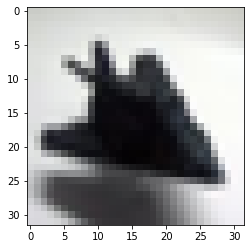

In [ ]:
import matplotlib.pyplot as plt

for image, label in dataset:
  print(image.shape, label)
  plt.imshow(image.permute(1,2,0))
  print("Label:", dataset.classes[label], "("+str(label)+")")
  break

In [ ]:
#Training and Validation Dataset
import numpy as np 
def split_indices(n , val_pct = 0.1, seed = 0.99):
  n_val = int(n*val_pct)
  np.random.seed(seed)
  idx = np.random.permutation(n)

  return idx[n_val:],idx[:n_val] 

In [ ]:
val_pct = 0.2
rand_Seed = 42

train_indices, val_indices = split_indices(len(dataset), val_pct, rand_Seed)
print(len(train_indices), len(val_indices))
print("Sample validation indices:", val_indices[:10])


40000 10000
Sample validation indices: [33553  9427   199 12447 39489 42724 10822 49498  4144 36958]


In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler 
from torch.utils.data.dataloader import DataLoader 

batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset, 
                      batch_size,
                      sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset,
                    batch_size, 
                    sampler = val_sampler)

In [ ]:
from torchvision.utils import make_grid 

def show_batch(dl):
  for images, label in dl:
    fig, ax = plt.subplots(figsize = (10,10))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, 10).permute(1,2,0))
    break


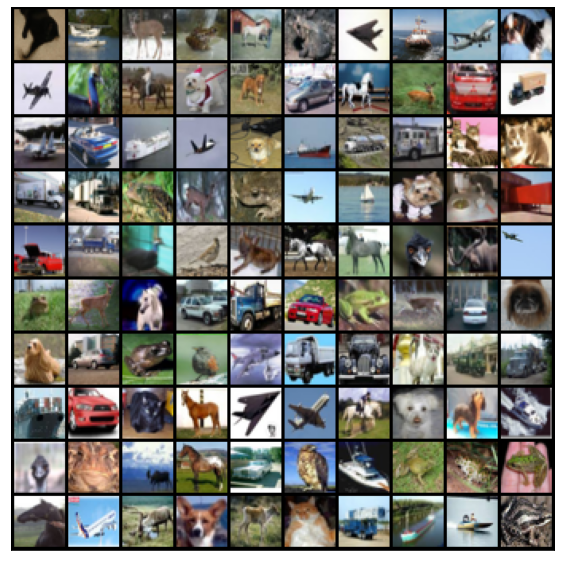

In [ ]:
show_batch(train_dl)

In [ ]:
import torch.nn as nn 
import torch.nn.functional as F

simple_model= nn.Sequential(
    nn.Conv2d(3 , 8, kernel_size = 3, stride = 1, padding = 1),
    nn.MaxPool2d(2,2)
)

In [ ]:
for image, label in train_dl:
  print(image.shape)
  out = simple_model(image)
  print(out.shape)
  break

torch.Size([100, 3, 32, 32])
torch.Size([100, 8, 16, 16])


In [ ]:
model = nn.Sequential(
    nn.Conv2d(3 , 16, kernel_size=3, stride=1, padding =1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(16 , 16, kernel_size=3, stride=1, padding =1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(16 , 16, kernel_size=3, stride=1, padding =1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(16 , 16, kernel_size=3, stride=1, padding =1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(16 , 16, kernel_size=3, stride=1, padding =1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),   

    nn.Flatten(),
    nn.Linear(16, 10) 

)

In [ ]:
model[0].weight.shape

torch.Size([16, 3, 3, 3])

In [ ]:
for image, label in train_dl:
  print(image.shape)
  out = model(image)
  print(out.shape)
  print(out[0])
  break

torch.Size([100, 3, 32, 32])
torch.Size([100, 10])
tensor([ 0.1980, -0.2000,  0.1239,  0.0490,  0.1185, -0.1443,  0.0700, -0.2166,
         0.0887, -0.1513], grad_fn=<SelectBackward0>)


In [ ]:
torch.max(F.softmax(out[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor(0.1214, grad_fn=<MaxBackward1>)

In [ ]:
torch.sum(F.softmax(out[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor(1.0000, grad_fn=<SumBackward0>)

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model = to_device(Cifar10CnnModel(), device)

In [ ]:
evaluate(model, val_dl)

{'val_acc': 0.09850000590085983, 'val_loss': 2.302997350692749}

In [ ]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001


In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.7633, val_loss: 1.4094, val_acc: 0.4805
Epoch [1], train_loss: 1.2494, val_loss: 1.1953, val_acc: 0.5708
Epoch [2], train_loss: 0.9975, val_loss: 0.9580, val_acc: 0.6579
Epoch [3], train_loss: 0.8228, val_loss: 0.8314, val_acc: 0.7092
Epoch [4], train_loss: 0.6816, val_loss: 0.8006, val_acc: 0.7213
Epoch [5], train_loss: 0.5689, val_loss: 0.7820, val_acc: 0.7407
Epoch [6], train_loss: 0.4548, val_loss: 0.7767, val_acc: 0.7440
Epoch [7], train_loss: 0.3520, val_loss: 0.8714, val_acc: 0.7461
Epoch [8], train_loss: 0.2788, val_loss: 0.8794, val_acc: 0.7560
Epoch [9], train_loss: 0.2138, val_loss: 0.9537, val_acc: 0.7531


In [ ]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.1747, val_loss: 1.1580, val_acc: 0.7442
Epoch [1], train_loss: 0.1441, val_loss: 1.1661, val_acc: 0.7571
Epoch [2], train_loss: 0.1198, val_loss: 1.3689, val_acc: 0.7468
Epoch [3], train_loss: 0.1114, val_loss: 1.3095, val_acc: 0.7524
Epoch [4], train_loss: 0.0942, val_loss: 1.3750, val_acc: 0.7391
Epoch [5], train_loss: 0.1015, val_loss: 1.3581, val_acc: 0.7556
Epoch [6], train_loss: 0.0875, val_loss: 1.4657, val_acc: 0.7487
Epoch [7], train_loss: 0.0824, val_loss: 1.4232, val_acc: 0.7496
Epoch [8], train_loss: 0.0787, val_loss: 1.5495, val_acc: 0.7421
Epoch [9], train_loss: 0.0881, val_loss: 1.4147, val_acc: 0.7500


In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

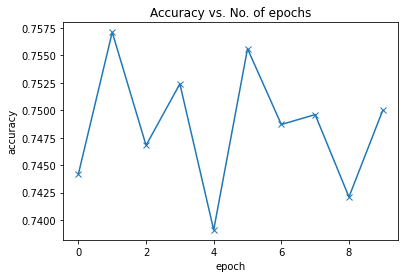

In [ ]:
plot_accuracies(history)

In [ ]:
import os 
import torch 
import torchvision 
import tarfile 
from torchvision.datasets.utils import download_url 


In [ ]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

#Extract rhe files 
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

    data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir+"/train")
print(classes)

Using downloaded and verified file: ./cifar10.tgz
['train', 'test']
['truck', 'cat', 'ship', 'frog', 'dog', 'horse', 'bird', 'airplane', 'automobile', 'deer']


In [ ]:
# Data transform (normalisation and data augmentation)
# ImageFolder is used to convert pixels into tensorts
# tt is used for transformation in the data augmentation 
from torchvision.datasets import ImageFolder 
import torchvision.transforms as tt 

stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.RandomCrop(32, padding = 4, padding_mode = 'reflect'),
                         tt.RandomHorizontalFlip(),
                         tt.ToTensor(),
                         tt.Normalize(*stats)])

valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])



In [ ]:
#Pytorch dataset 

train_ds = ImageFolder(data_dir + '/train', train_tfms)
valid_ds = ImageFolder(data_dir + '/test', valid_tfms)


In [ ]:
#Dataloaders 
from torch.utils.data import DataLoader 
batch_size = 256 

# num_worker argument can be used to allocate multiple CPU cores and load images in parallel. 
#  Pin_memory is used to avoid repetation of the allocation and dellocation by using same propotion of memory for loading each memory of the data. 
 
train_dl = DataLoader(train_ds, batch_size, shuffle = True, 
                       num_workers = 8 , pin_memory = True)

valid_dl = DataLoader(valid_ds, batch_size, shuffle = False, 
                      num_workers = 8, pin_memory = True)



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torchvision.utils import make_grid 
import matplotlib.pyplot as plt

def show_batch(dl):
  for images , label in dl:
    fig, ax = plt.subplots(figsize = (16,16))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images[:100], 10 ).permute(1,2,0))
    break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


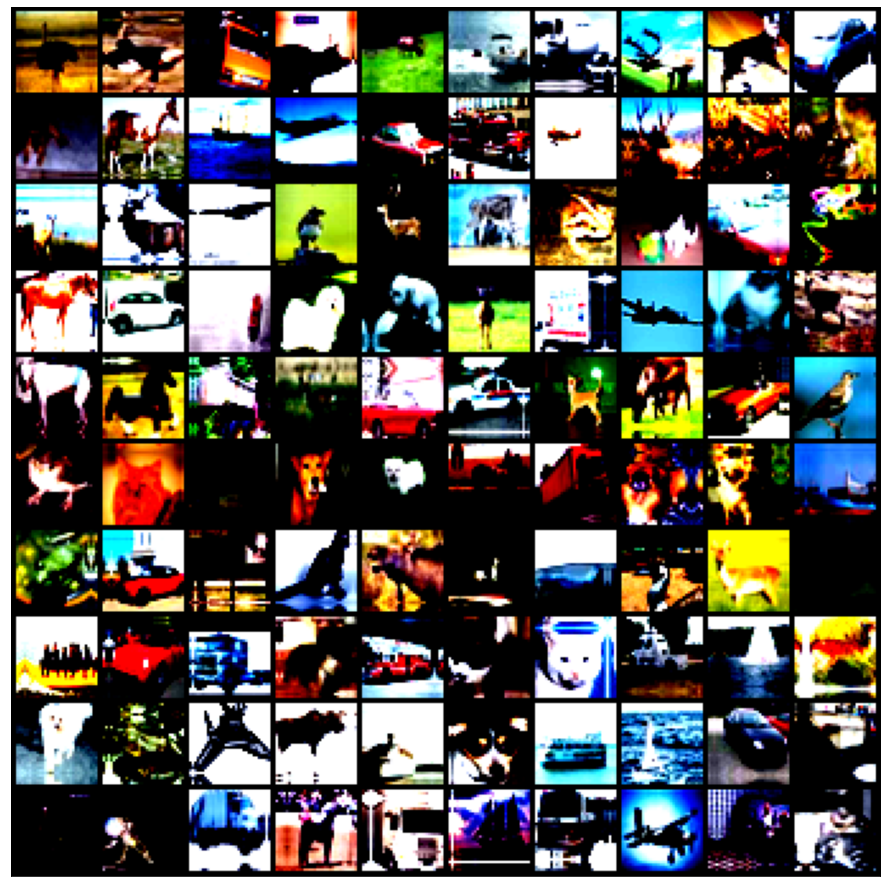

In [ ]:
show_batch(train_dl)

In [ ]:
import torch.nn as nn 
import torch.nn.functional as F 


class SimpleResidualBlock(nn.Module):
  def __init__(self):
    super().__init__()
    self.Conv1 = nn.Conv2d(in_channels =3 , out_channels =3, kernel_size = 3, stride = 1, padding =1)
    self.relu1 = nn.ReLU()
    self.con2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride =1 , padding =1)
    self.relu2 = nn.ReLU()

  def forward(self,x):
    out = self.Conv1(x)
    out = self.relu1(out)
    out = self.con2(out)
    return self.relu2(out + x)
    


In [ ]:
simple_resnet = SimpleResidualBlock()

for images , labels in train_dl:
  out = simple_resnet(images)
  print(out.shape)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([256, 3, 32, 32])


In [ ]:
# GANS(Generative Adversal Networks)

import torch 
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Normalize, Compose 

In [ ]:
mnist =   MNIST(root = "data",
                train = True, 
                download = True, 
                transform = Compose([ToTensor(), Normalize(mean = (0.5,), std=(0.5,))]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
for image, label in mnist:
  print(image.shape)
  print(image[:,10:15,10:15])
  print(label)
  break

torch.Size([1, 28, 28])
tensor([[[-0.9922,  0.2078,  0.9843, -0.2941, -1.0000],
         [-1.0000,  0.0902,  0.9843,  0.4902, -0.9843],
         [-1.0000, -0.9137,  0.4902,  0.9843, -0.4510],
         [-1.0000, -1.0000, -0.7255,  0.8902,  0.7647],
         [-1.0000, -1.0000, -1.0000, -0.3647,  0.8824]]])
5


In [ ]:
#  For generating the iamges from the output, we need to denormalize the data 
def denorm(x):
  out = (x+1)/2
  return out.clamp(0,1)
  

5


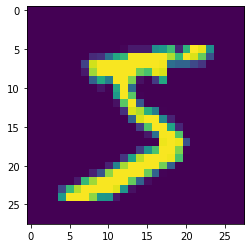

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
image, label = mnist[0]

img_norm = denorm(image)
plt.imshow(img_norm[0])
print(label)


In [ ]:
from torch.utils.data import DataLoader

batch_size = 100
data_loader = DataLoader(mnist,
                         batch_size, 
                         shuffle = True)

torch.Size([100, 1, 28, 28])
tensor([0, 7, 6, 0, 8, 9, 9, 3, 5, 6, 1, 9, 6, 5, 9, 3, 1, 9, 6, 9, 2, 8, 9, 9,
        3, 9, 9, 3, 2, 9, 8, 1, 2, 4, 9, 8, 4, 5, 5, 7, 6, 3, 6, 7, 6, 6, 2, 7,
        5, 7, 3, 0, 2, 0, 6, 6, 9, 7, 3, 5, 3, 6, 7, 2, 9, 6, 9, 0, 4, 6, 2, 8,
        4, 7, 5, 8, 4, 4, 4, 6, 3, 0, 6, 3, 9, 8, 1, 3, 7, 5, 1, 8, 2, 8, 4, 7,
        3, 9, 7, 8])


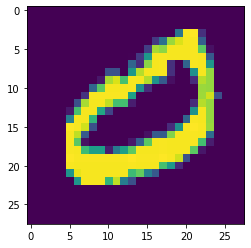

In [ ]:
from torch.utils import data
for image, label in data_loader:
  print(image.shape)
  plt.imshow(image[0][0])
  print(label)
  break 


In [ ]:
device = torch.device('cude' if torch.cuda.is_available() else 'cpu')
device 

device(type='cpu')

In [ ]:
from torch.nn.modules.linear import Linear
image_size = 784 
hidden_size = 256 

import torch.nn as nn

# Discrimiator model 
D = nn.Sequential(
    nn.Linear(image_size,hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size,hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size,1), #Single output: Probability if it is real 
    nn.Sigmoid()
)

In [ ]:
D.to(device);

In [ ]:
# Generator Model 

latent_size = 64 

G = nn.Sequential(
    nn.Linear(latent_size,hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size,hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size,image_size),
    nn.Tanh()
)

In [ ]:
#  Input of the generator 
y = G(torch.randn(2, latent_size))
gen_imgs = denorm(y.reshape((-1,28,28)).detach())

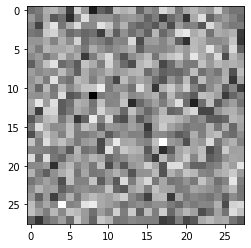

In [ ]:
plt.imshow(gen_imgs[0], cmap = 'gray')

In [ ]:
G.to(device);

In [ ]:
criteria = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr = 0.002)
g_optimizer = torch.optim.Adam(G.parameters(), lr = 0.002)

In [ ]:
def reset_grad():
  d_optimizer.zero_grad()
  g_optimizer.zero_grad()

def train_discriminator(images):
  real_labels = torch.ones(batch_size,1).to(device)
  fake_labels = torch.ones(batch_size,1).to(device)


  outputs = D(images)
  d_loss_real = criteria(outputs, real_labels)
  real_score = outputs

  z = torch.randn(batch_size, latent_size).to(device)
  fake_images = G(z)
  outputs = D(fake_images)
  d_fake_loss = criteria(outputs, fake_labels)
  fake_score = outputs

  d_loss = d_loss_real + d_fake_loss
  reset_grad()
  d_loss.backward()
  d_optimizer.step()

  return d_loss, real_score, fake_score 


In [ ]:
z = torch.randn(batch_size, latent_size).to(device)
fake_images = G(z)
D(fake_images)

tensor([[0.5140],
        [0.5120],
        [0.5100],
        [0.5135],
        [0.5097],
        [0.5128],
        [0.5131],
        [0.5096],
        [0.5111],
        [0.5081],
        [0.5107],
        [0.5131],
        [0.5098],
        [0.5109],
        [0.5089],
        [0.5115],
        [0.5111],
        [0.5108],
        [0.5147],
        [0.5080],
        [0.5087],
        [0.5096],
        [0.5082],
        [0.5128],
        [0.5122],
        [0.5103],
        [0.5114],
        [0.5091],
        [0.5109],
        [0.5118],
        [0.5113],
        [0.5109],
        [0.5102],
        [0.5127],
        [0.5081],
        [0.5104],
        [0.5115],
        [0.5083],
        [0.5120],
        [0.5117],
        [0.5107],
        [0.5124],
        [0.5105],
        [0.5130],
        [0.5133],
        [0.5108],
        [0.5110],
        [0.5102],
        [0.5108],
        [0.5120],
        [0.5113],
        [0.5074],
        [0.5127],
        [0.5078],
        [0.5091],
        [0

In [ ]:
def train_generator():
  z = torch.randn(batch_size, latent_size).to(device)
  fake_images = G(z)
  labels = torch.ones(batch_size , 1).to(device)
  g_loss = criteria(D(fake_images), labels)

  reset_grad()
  g_loss.backward()
  g_optimizer.step()

  return g_loss, fake_images


In [ ]:
import os 

sample_dir = 'samples'
if not 